In [1]:
#install.packages('arules')
library(arules)
#install.packages('arulesViz')
library(arulesViz)


Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


In [2]:
data <- readRDS('data.rds')

In [3]:
data$Customer.Satisfaction[data$Likelihood.to.recommend>7] <- "High"
data$Customer.Satisfaction[data$Likelihood.to.recommend<=7 & data$Likelihood.to.recommend>4] <- "Med"
data$Customer.Satisfaction[data$Likelihood.to.recommend<=4] <- "Low"
data$Customer.Satisfaction <- factor(as.character(data$Customer.Satisfaction))

In [4]:
data$Destination.City <- NULL
data$Origin.City <- NULL
#data$Year.of.First.Flight <- NULL
data$Partner.Code <- NULL
#data$Scheduled.Departure.Hour <- NULL
data$olong <- NULL
data$olat <- NULL
data$dlong <- NULL
data$dlat <- NULL
data$Flight.date <- NULL
data$Loyalty <- NULL
data$Likelihood.to.recommend <- NULL
#data$Day.of.Month <- NULL

In [5]:
str(data)

'data.frame':	10268 obs. of  22 variables:
 $ Airline.Status                : Factor w/ 4 levels "Blue","Gold",..: 1 4 4 1 1 1 1 1 1 1 ...
 $ Age                           : int  30 57 75 55 80 48 68 31 17 41 ...
 $ Gender                        : Factor w/ 2 levels "F","M": 1 1 1 1 2 1 2 1 1 2 ...
 $ Price.Sensitivity             : int  3 1 3 1 0 2 1 1 2 1 ...
 $ Year.of.First.Flight          : Factor w/ 10 levels "2003","2004",..: 10 5 7 3 1 10 4 2 4 7 ...
 $ Flights.Per.Year              : int  6 27 35 13 77 52 33 15 8 3 ...
 $ Type.of.Travel                : Factor w/ 3 levels "Business travel",..: 1 3 3 1 3 3 3 2 1 1 ...
 $ Total.Freq.Flyer.Accts        : int  0 0 0 0 0 0 0 2 1 0 ...
 $ Shopping.Amount.at.Airport    : int  15 0 0 10 0 0 0 10 30 0 ...
 $ Eating.and.Drinking.at.Airport: int  30 65 15 35 30 30 210 90 50 10 ...
 $ Class                         : Factor w/ 3 levels "Business","Eco",..: 3 2 2 2 2 2 3 2 2 2 ...
 $ Day.of.Month                  : int  17 23 25 16 14 31 5 

In [6]:
data$Age.Group[data$Age<21] <- "Children"
data$Age.Group[data$Age>=21 & data$Age<45] <- "Young Adult"
data$Age.Group[data$Age>=45 & data$Age<65] <- "Middle Adult"
data$Age.Group[data$Age>=65] <- "Old Adult"
data$Age.Group <- factor(as.character(data$Age.Group))
data$Age <- NULL

In [7]:
data$Price.Sensitivity <- factor(as.character(data$Price.Sensitivity))
data$Scheduled.Departure.Hour <- factor(as.character(data$Scheduled.Departure.Hour))
data$Total.Freq.Flyer.Accts <- factor(as.character(data$Total.Freq.Flyer.Accts))

In [8]:
data$Flight.Time.Group[data$Flight.time.in.minutes<=60] <- "Under 1hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>60 & data$Flight.time.in.minutes<=120] <- "1-2hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>120 & data$Flight.time.in.minutes<=180] <- "2-3hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>180 & data$Flight.time.in.minutes<=240] <- "3-4hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>240 & data$Flight.time.in.minutes<=300] <- "4-5hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>300 & data$Flight.time.in.minutes<=360] <- "5-6hr"
data$Flight.Time.Group[data$Flight.time.in.minutes>360] <- "Over 6hr"
data$Flight.Time.Group<- factor(as.character(data$Flight.Time.Group))
data$Flight.time.in.minutes <- NULL

In [9]:
data$Flight.Distance.Group[data$Flight.Distance<=500] <- "500 & Below"
data$Flight.Distance.Group[data$Flight.Distance>500 & data$Flight.Distance<=1000] <- "500-1000"
data$Flight.Distance.Group[data$Flight.Distance>1000 & data$Flight.Distance<=2000] <- "1000-2000"
data$Flight.Distance.Group[data$Flight.Distance>2000 & data$Flight.Distance<=3000] <- "2000-3000"
data$Flight.Distance.Group[data$Flight.Distance>3000] <- "Above 3000"
data$Flight.Distance.Group<- factor(as.character(data$Flight.Distance.Group))
data$Flight.Distance <- NULL

In [10]:
data$Flights.Per.Year.Group[data$Flights.Per.Year<=5] <- "5 & Below"
data$Flights.Per.Year.Group[data$Flights.Per.Year>5 & data$Flights.Per.Year<=10] <- "5-10"
data$Flights.Per.Year.Group[data$Flights.Per.Year>10 & data$Flights.Per.Year<=15] <- "10-15"
data$Flights.Per.Year.Group[data$Flights.Per.Year>15 & data$Flights.Per.Year<=20] <- "15-20"
data$Flights.Per.Year.Group[data$Flights.Per.Year>20 & data$Flights.Per.Year<=25] <- "20-25"
data$Flights.Per.Year.Group[data$Flights.Per.Year>25 & data$Flights.Per.Year<=30] <- "25-30"
data$Flights.Per.Year.Group[data$Flights.Per.Year>30] <- "Above 30"
data$Flights.Per.Year.Group<- factor(as.character(data$Flights.Per.Year.Group))
data$Flights.Per.Year <- NULL

In [11]:
data$Day.of.Month.Group[data$Day.of.Month<=7] <- 'Week 1'
data$Day.of.Month.Group[data$Day.of.Month>7 & data$Day.of.Month<=14] <- 'Week 2'
data$Day.of.Month.Group[data$Day.of.Month>14 & data$Day.of.Month<=21] <- 'Week 3'
data$Day.of.Month.Group[data$Day.of.Month>21] <- 'Week 4'
data$Day.of.Month.Group <- factor(as.character(data$Day.of.Month.Group))
data$Day.of.Month <- NULL

In [12]:
data$Departure.Delay.Group[data$Departure.Delay.in.Minutes==0] <- "No Delay"
data$Departure.Delay.Group[data$Departure.Delay.in.Minutes>0 & data$Departure.Delay.in.Minutes<=5] <- "5mins or Less"
data$Departure.Delay.Group[data$Departure.Delay.in.Minutes>5 & data$Departure.Delay.in.Minutes<=15] <- "5-15mins"
data$Departure.Delay.Group[data$Departure.Delay.in.Minutes>15] <- "More than 15mins"
data$Departure.Delay.Group <- factor(as.character(data$Departure.Delay.Group))
data$Departure.Delay.in.Minutes <- NULL 

In [13]:
data$Arrival.Delay.Group[data$Arrival.Delay.in.Minutes==0] <- "No Delay"
data$Arrival.Delay.Group[data$Arrival.Delay.in.Minutes>0 & data$Arrival.Delay.in.Minutes<=5] <- "5mins or Less"
data$Arrival.Delay.Group[data$Arrival.Delay.in.Minutes>5 & data$Arrival.Delay.in.Minutes<=15] <- "5-15mins"
data$Arrival.Delay.Group[data$Arrival.Delay.in.Minutes>15] <- "More than 15mins"
data$Arrival.Delay.Group <- factor(as.character(data$Arrival.Delay.Group))
data$Arrival.Delay.in.Minutes <- NULL 

In [14]:
data$Shopping.Amount.Group[data$Shopping.Amount.at.Airport==0] <- '0'
data$Shopping.Amount.Group[data$Shopping.Amount.at.Airport>0 & data$Shopping.Amount.at.Airport<=10] <- 'Under 10'
data$Shopping.Amount.Group[data$Shopping.Amount.at.Airport>10 & data$Shopping.Amount.at.Airport<=20] <- '10-20'
data$Shopping.Amount.Group[data$Shopping.Amount.at.Airport>20 & data$Shopping.Amount.at.Airport<=30] <- '20-30'
data$Shopping.Amount.Group[data$Shopping.Amount.at.Airport>30] <- 'Above 30'
data$Shopping.Amount.Group <- factor(as.character(data$Shopping.Amount.Group))
data$Shopping.Amount.at.Airport <- NULL

In [15]:
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport==0] <- '0'
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport>0 & data$Eating.and.Drinking.at.Airport<=10] <- 'Under 10'
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport>10 & data$Eating.and.Drinking.at.Airport<=30] <- '10-30'
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport>30 & data$Eating.and.Drinking.at.Airport<=60] <- '30-60'
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport>60 & data$Eating.and.Drinking.at.Airport<=90] <- '30-60'
data$Eating.and.Drinking.Group[data$Eating.and.Drinking.at.Airport>90] <- 'Above 90'
data$Eating.and.Drinking.Group <- factor(as.character(data$Eating.and.Drinking.Group))
data$Eating.and.Drinking.at.Airport <- NULL


In [16]:
str(data)

'data.frame':	10268 obs. of  22 variables:
 $ Airline.Status           : Factor w/ 4 levels "Blue","Gold",..: 1 4 4 1 1 1 1 1 1 1 ...
 $ Gender                   : Factor w/ 2 levels "F","M": 1 1 1 1 2 1 2 1 1 2 ...
 $ Price.Sensitivity        : Factor w/ 5 levels "0","1","2","3",..: 4 2 4 2 1 3 2 2 3 2 ...
 $ Year.of.First.Flight     : Factor w/ 10 levels "2003","2004",..: 10 5 7 3 1 10 4 2 4 7 ...
 $ Type.of.Travel           : Factor w/ 3 levels "Business travel",..: 1 3 3 1 3 3 3 2 1 1 ...
 $ Total.Freq.Flyer.Accts   : Factor w/ 10 levels "0","1","2","3",..: 1 1 1 1 1 1 1 3 2 1 ...
 $ Class                    : Factor w/ 3 levels "Business","Eco",..: 3 2 2 2 2 2 3 2 2 2 ...
 $ Partner.Name             : Factor w/ 14 levels "Cheapseats Airlines Inc.",..: 12 8 5 10 12 4 13 5 1 1 ...
 $ Origin.State             : Factor w/ 49 levels "Alabama","Alaska",..: 22 5 27 17 9 34 32 46 20 5 ...
 $ Destination.State        : Factor w/ 49 levels "Alabama","Alaska",..: 3 44 9 5 8 12 43 48 43 6 ...

In [17]:
head(data)

Airline.Status,Gender,Price.Sensitivity,Year.of.First.Flight,Type.of.Travel,Total.Freq.Flyer.Accts,Class,Partner.Name,Origin.State,Destination.State,...,Customer.Satisfaction,Age.Group,Flight.Time.Group,Flight.Distance.Group,Flights.Per.Year.Group,Day.of.Month.Group,Departure.Delay.Group,Arrival.Delay.Group,Shopping.Amount.Group,Eating.and.Drinking.Group
Blue,F,3,2012,Business travel,0,Eco Plus,Sigma Airlines Inc.,Minnesota,Arizona,...,Med,Young Adult,2-3hr,1000-2000,5-10,Week 3,No Delay,No Delay,10-20,10-30
Silver,F,1,2007,Personal Travel,0,Eco,Northwest Business Airlines Inc.,California,Utah,...,Med,Middle Adult,1-2hr,500-1000,25-30,Week 4,No Delay,5mins or Less,0,30-60
Silver,F,3,2009,Personal Travel,0,Eco,FlyHere Airways,Nevada,Georgia,...,High,Old Adult,3-4hr,1000-2000,Above 30,Week 4,5mins or Less,No Delay,0,10-30
Blue,F,1,2005,Business travel,0,Eco,Oursin Airlines Inc.,Louisiana,California,...,High,Middle Adult,4-5hr,1000-2000,10-15,Week 3,No Delay,No Delay,Under 10,30-60
Blue,M,0,2003,Personal Travel,0,Eco,Sigma Airlines Inc.,Georgia,Florida,...,Low,Old Adult,Under 1hr,500 & Below,Above 30,Week 2,No Delay,No Delay,0,10-30
Blue,F,2,2012,Personal Travel,0,Eco,FlyFast Airways Inc.,Ohio,Illinois,...,Low,Middle Adult,1-2hr,500 & Below,Above 30,Week 4,No Delay,5-15mins,0,10-30


In [18]:
table(data$Customer.Satisfaction)


High  Low  Med 
5661 1753 2854 

In [19]:
df <- data[,c('Type.of.Travel','Airline.Status','Age.Group','Arrival.Delay.Group','Destination.State','Eating.and.Drinking.Group','Flight.cancelled','Gender','Customer.Satisfaction')]

In [20]:
dataX <- as(df,"transactions")

In [21]:
dataX

transactions in sparse format with
 10268 transactions (rows) and
 76 items (columns)

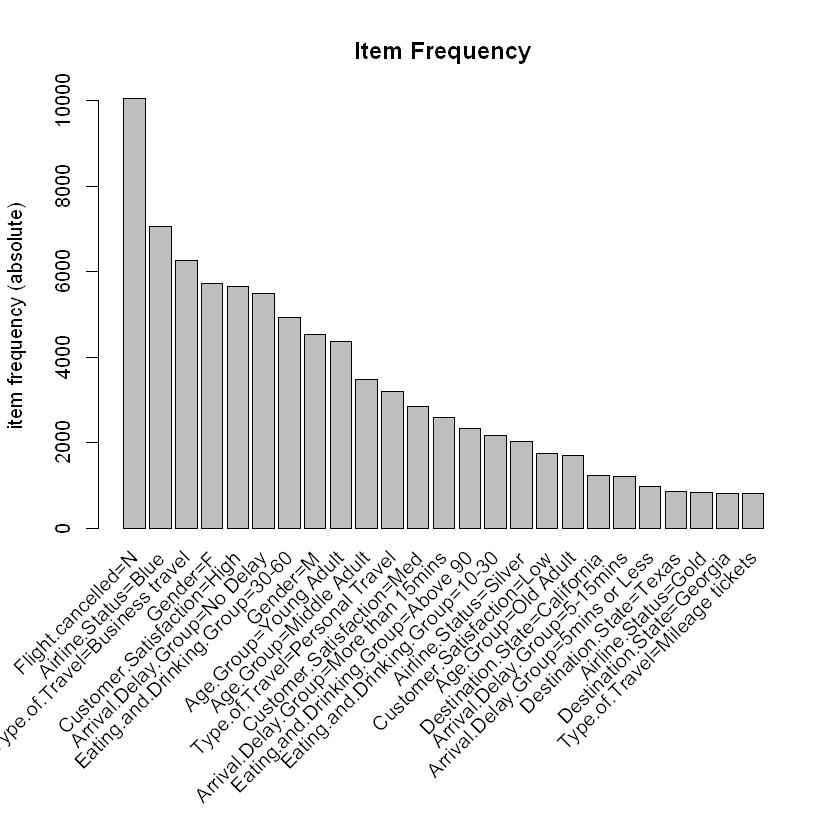

In [22]:
itemFrequencyPlot(dataX,topN=25, type="absolute", main="Item Frequency")

In [23]:
ruleset <- apriori(dataX, parameter=list(support=0.005,confidence=0.7),appearance = list(default="lhs", rhs=c("Customer.Satisfaction=High","Customer.Satisfaction=Med","Customer.Satisfaction=Low")))
rules_conf <- sort (ruleset, by="confidence", decreasing=TRUE)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 51 

set item appearances ...[3 item(s)] done [0.00s].
set transactions ...[76 item(s), 10268 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.02s].
writing ... [1982 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [24]:
inspect(rules_conf)

       lhs                                       rhs                              support confidence     lift count
[1]    {Type.of.Travel=Mileage tickets,                                                                            
        Airline.Status=Silver,                                                                                     
        Age.Group=Young Adult}                => {Customer.Satisfaction=High} 0.006525127  0.9852941 1.787140    67
[2]    {Type.of.Travel=Mileage tickets,                                                                            
        Airline.Status=Silver,                                                                                     
        Age.Group=Young Adult,                                                                                     
        Flight.cancelled=N}                   => {Customer.Satisfaction=High} 0.006427737  0.9850746 1.786742    66
[3]    {Type.of.Travel=Mileage tickets,                                 

In [25]:
inspectDT(rules_conf)

HTML widgets cannot be represented in plain text (need html)